# Лабораторная работа №5 по вычислительной математике
## Вычисление определенных интегралов квадратурами Ньютона-Котеса. Метод Рунге.
### Выполнил Филиппенко Павел -- студент группы Б01-009

##### Задание VII 9.5 д)

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
x = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1])
f = np.array([0.0, 0.124670, 0.247234, 0.364902, 0.473112, 0.563209, 0.616193, 0.579699, 0.0])

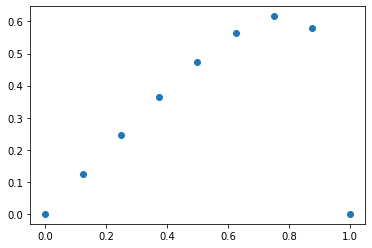

In [82]:
plt.scatter(x, f)

In [83]:
# Внимание, данные функции работают только в случае РАВНОМЕРНОЙ сетки!
# Функции вычисления определенного интеграла с использованием квадратур Ньютона-Котеса

# Метод трапеций
# x, y -- узлы сетки и значения функции в этих узлах
# r    -- scaling factor; позволяет увеличивать имеющийся шаг сетки (см уточнение результата по правилу Рунге) 
def TrpapezMthd(x, y, r=1) -> float:
    res = 0
    # изначально задаем стандартный шаг
    h = x[1] - x[0]
    N = np.shape(x)[0]
    # в случае если задан параметр r, в цикле увеличиваем шаг, а так же увеличиваем шаг сетки
    for i in range(0, N-r, r):
        res += ((f[i] + f[i+r]) / 2) * h*r
    return res

# Метод Симпсона
def SympsonMthd(x, y) -> float:
    res = 0
    h = x[1] - x[0] 
    N = np.shape(x)[0]
    for i in range(0, N - 2, 2):
        res += ((f[i] + 4*f[i+1] + f[i+2]) / 6) * h*2
    return res

Метод Рунге-Ромберга-Ричардсона позволяет получить более высокий порядок
точности без значительного увеличения числа арифметических действий. Точность можно повысить, вычисляя
значения интеграла при различных значениях шага сетки $rh$ ($r = 1, 2, \dots$).

Пусть $I$ -- значение итеграла, $I_h$ -- значение, полученное численно на сетке с шагом $h$. Тогда
погрешность вычисления можно записать следующим образом
$$I - I_h = \psi_h h^p + o(h^{p+1})$$

где $p$ -- порядок точности квадратуры, $\psi_h h^p$ -- главный член погрешности. Увеличим шаг сетки в
$r$ раз и получим
$$I - I_{rh} = \psi_{rh} (rh)^p + o(h^{p+1})$$

при малых $h$ можем считать, что $\psi_h \approx \psi_{rh} = \psi$, тогда

$$I_h - I_{rh} = h^p (r^p - 1) \psi$$
$$\psi h^p = \frac{I_h - I_{rh}}{(r^p - 1)}$$

Таким образом, уточняя главный член погрешности, мы можем уточнить численное значение интеграла

$$I = I_h + \psi h^p +o(h^{p+1}) \approx I_h + \psi h^p$$
$$I \approx \frac{r^p I_h - I_{rh}}{r^p - 1}$$

_Note:_ в данной работе для вычисления значения определенного интеграла мы используем формулу трапеции.
Это формула 2 порядка точности, поэтому $p = 2$.

In [84]:
p = 2
r = 2

# Вычислим численное значение интеграла с обычным шагом сетки
Ih  = TrpapezMthd(x, f)
# Вычислим численное значение интеграла с удвоенным шагом сетки
Irh = TrpapezMthd(x, f, r)

# вычислим уточненное значение интеграла
I = (r**p * Ih - Irh)/(r**p - 1)
Is = SympsonMthd(x, f)
eps = abs(Is - I)

print("="*100)
print("Значение интеграла с обычным шагом сетки \nIh = ", Ih)
print("="*100)
print("Значение интеграла с удвоенным шагом сетки \nI2h = ", Irh)
print("="*100)
print("Значение интеграла, уточненное методом Рунге \nI = ", I)
print("="*100)
print("Значение интеграла, посчитанное методом Симпсона \nIs = ", Is)
print("="*100)
print("Расхождение значений, полученных методом Симпсона и методом трапеций \neps = ", abs(Ih - Is))
print("="*100)
print("Расхождение значений, полученных методом Симпсона и методом Рунге \neps = ", eps)
print("="*100)

Значение интеграла с обычным шагом сетки 
Ih =  0.371127375
Значение интеграла с удвоенным шагом сетки 
I2h =  0.33413475
Значение интеграла, уточненное методом Рунге 
I =  0.38345824999999994
Значение интеграла, посчитанное методом Симпсона 
Is =  0.38345825
Расхождение значений, полученных методом Симпсона и методом трапеций 
eps =  0.012330875000000019
Расхождение значений, полученных методом Симпсона и методом Рунге 
eps =  5.551115123125783e-17


# Вывод:
Как видно, для получения более точного численного значения определенного интеграла, не обязательно использовать методы
с высоким порядком точности. Метод уточнения Рунге позволяет получить ответ с примерно такой же точностью, что и при использовании
метода Симпсона (отличие в ответах порядка $\varepsilon \sim 10^{-17}$).